# PCA
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# load data

In [2]:
#Load Dataset
frogs: pd.DataFrame = pd.read_csv("Frogs_MFCCs.csv")
obs = frogs.shape[0]
dims = frogs.shape[1]-4
print(f'shape: {obs} observations, {dims} features')
print(f'columns: {frogs.columns.values}') 
print(f'Species: \n{frogs["Species"].value_counts()}')

shape: 7195 observations, 22 features
columns: ['MFCCs_ 1' 'MFCCs_ 2' 'MFCCs_ 3' 'MFCCs_ 4' 'MFCCs_ 5' 'MFCCs_ 6'
 'MFCCs_ 7' 'MFCCs_ 8' 'MFCCs_ 9' 'MFCCs_10' 'MFCCs_11' 'MFCCs_12'
 'MFCCs_13' 'MFCCs_14' 'MFCCs_15' 'MFCCs_16' 'MFCCs_17' 'MFCCs_18'
 'MFCCs_19' 'MFCCs_20' 'MFCCs_21' 'MFCCs_22' 'Family' 'Genus' 'Species'
 'RecordID']
Species: 
AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: Species, dtype: int64


In [3]:
labels = ['Family' ,'Genus' ,'Species']
features = ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22']

df_labels     : pd.DataFrame = frogs[labels]
df            : pd.DataFrame = frogs[features]


# feature matrix
as a numpy array

<function matplotlib.pyplot.show(close=None, block=None)>

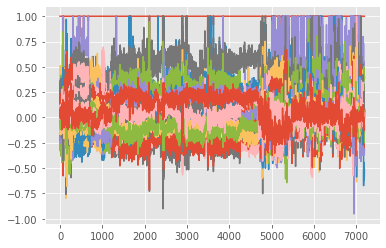

In [4]:
X: np.ndarray= df.values
X.shape
plt.plot(X)
plt.show


# normalize data

<function matplotlib.pyplot.show(close=None, block=None)>

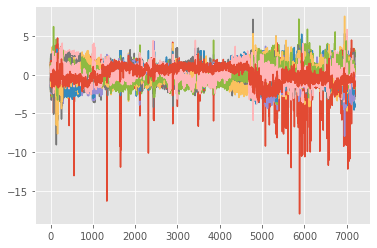

In [5]:
from sklearn.preprocessing import StandardScaler

#create object
scaler = StandardScaler()

#calculate meand and variance
scaler.fit(X)

#transfort the values
X_scaled = scaler.transform(X)
X_scaled
plt.plot(X_scaled)
plt.show

# PCA (no dimensionality reduction)

<function matplotlib.pyplot.show(close=None, block=None)>

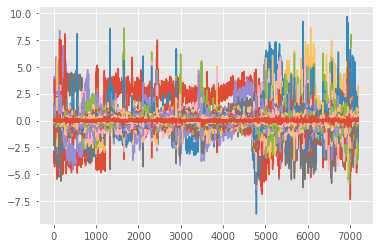

In [6]:
from sklearn.decomposition import PCA   

pca_22 = PCA(n_components=22)
pca_22.fit(X_scaled)
X_pca_22 = pca_22.transform(X_scaled)
plt.plot(X_pca_22)
plt.show


## Explained variance

Text(0, 0.5, 'Explained variance')

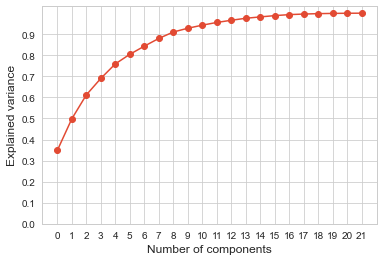

In [39]:
plt.plot(np.cumsum(pca_22.explained_variance_ratio_), marker = 'o')
plt.xticks( range(0,22,1) )
plt.yticks( np.arange(0,1,.1) )
plt.xlabel('Number of components')
plt.ylabel('Explained variance')


In [43]:
#pairplot
X_pca_df = pd.DataFrame(X_pca_22)
X_pca_df = pd.concat((X_pca_df, df_labels), 1)
cc = [0,1,2,3, 'Species']
X_pca_df = X_pca_df[cc]
X_pca_df



,0,1,2,3,Species
0,-3.712956,-1.226478,3.064140,0.640642,AdenomeraAndre
1,-3.724550,-1.545762,3.244051,0.646757,AdenomeraAndre
2,-3.140749,-1.740167,3.095270,1.190004,AdenomeraAndre
3,-3.532968,-1.760899,3.468054,0.285448,AdenomeraAndre
4,-3.280591,-1.986265,3.691547,1.258442,AdenomeraAndre
...,...,...,...,...,...
7190,-3.074746,-1.987734,2.529745,-1.152360,ScinaxRuber
7191,-2.919222,-1.914616,2.676608,-1.191422,ScinaxRuber
7192,-2.671663,-1.999559,2.587433,-0.778914,ScinaxRuber
7193,-3.004259,-1.997125,2.519739,-1.221311,ScinaxRuber


# PCA dimensionality reduction

<function matplotlib.pyplot.show(close=None, block=None)>

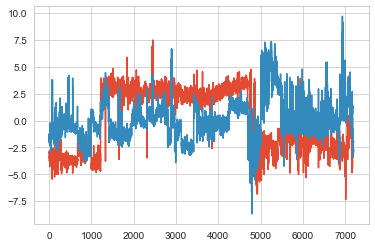

In [44]:
pc = PCA(n_components=2)
pc.fit(X_scaled)
X_pc = pc.transform(X_scaled)
plt.plot(X_pc)
plt.show

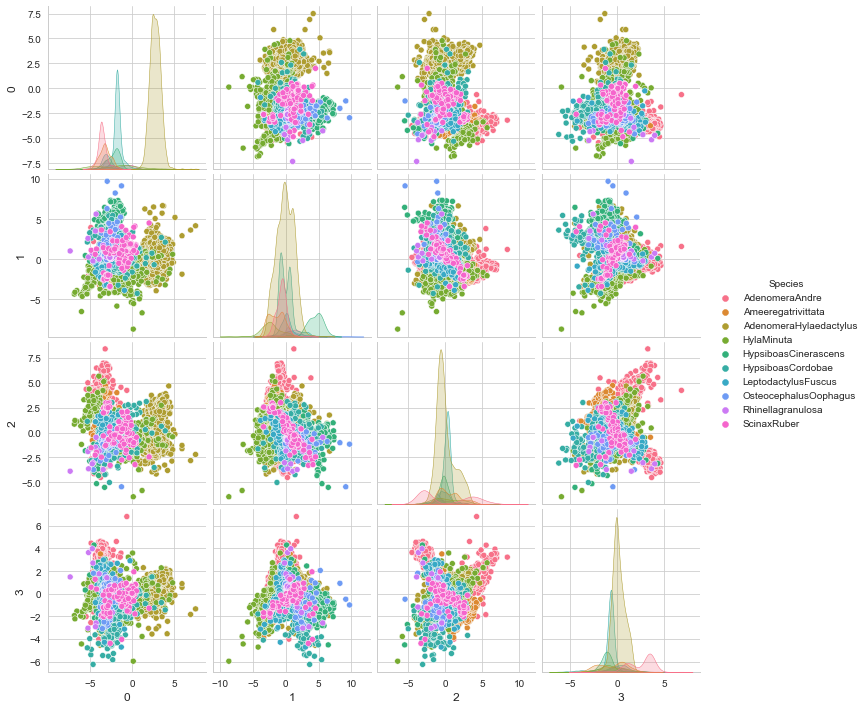

In [45]:

sns.set_style("whitegrid")
sns.pairplot(X_pca_df,hue = 'Species')
plt.show()

# Focus on 3 Species: 
AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672

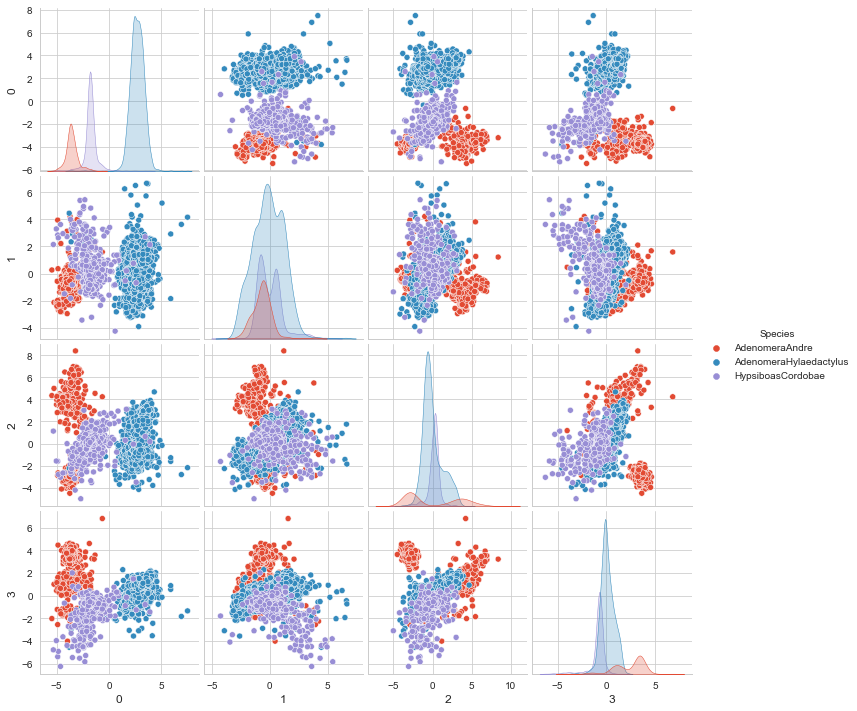

In [47]:
df = X_pca_df[ X_pca_df.Species.isin(['AdenomeraHylaedactylus', 'HypsiboasCordobae', 'AdenomeraAndre'])]
sns.set_style("whitegrid")
sns.pairplot(df,hue = 'Species')
plt.show()